<a href="https://colab.research.google.com/github/VEDANG2108/EDA-PROJECT/blob/main/22BDS0057.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align:left;">
  <b>Name:</b> VEDANG JITENDRA GARG<br>
  <b>Reg No:</b> 22BDS0057
</div>

<div style="display:flex; justify-content:center; align-items:center;">
  <h1>EXPLORATORY DATA ANALYSIS PROJECT</h1>
</div>



Dataset link: https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Liver%20Data.csv

<b> Load the Dataset </b>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Liver%20Data.csv"

df = pd.read_csv(url)

df.head()


,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


<b> Dimensions </b>

In [3]:
# 1. Shape of dataset
rows, cols = df.shape
print(f"Dataset Dimensions: {rows} rows × {cols} columns")

# 2. Feature type counts
print("\nFeature Types Count:")
print(df.dtypes.value_counts())

# 3. Data Types & Non-null Counts
print("\n--- Data Types & Non-null Counts ---")
print(df.info())



Dataset Dimensions: 30691 rows × 11 columns

Feature Types Count:
float64    9
object     1
int64      1
Name: count, dtype: int64

--- Data Types & Non-null Counts ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non

<b> Summary Statistics </b>

In [ ]:
# Numerical summary statistics
print("\n--- Numerical Summary Statistics ---")
print(df.describe())

# Categorical summary statistics
print("\n--- Categorical Summary Statistics ---")
print(df.describe(include='object'))

# Value counts for categorical columns
print("\n--- Value Counts for Categorical Columns ---")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())



--- Numerical Summary Statistics ---
       Age of the patient  Total Bilirubin  Direct Bilirubin  \
count        30689.000000     30043.000000      30130.000000   
mean            44.107205         3.370319          1.528042   
std             15.981043         6.255522          2.869592   
min              4.000000         0.400000          0.100000   
25%             32.000000         0.800000          0.200000   
50%             45.000000         1.000000          0.300000   
75%             55.000000         2.700000          1.300000   
max             90.000000        75.000000         19.700000   

        Alkphos Alkaline Phosphotase   Sgpt Alamine Aminotransferase  \
count                   29895.000000                    30153.000000   
mean                      289.075364                       81.488641   
std                       238.537589                      182.158850   
min                        63.000000                       10.000000   
25%                      

<b> Data Handling </b>

In [4]:
# --- Data Handling ---
print("\n--- Missing Values Count ---")
print(df.isnull().sum())

print("\n--- Duplicate Rows ---")
print(df.duplicated().sum())


--- Missing Values Count ---
Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

--- Duplicate Rows ---
11323


<b> Data Cleaning </b>

In [7]:
# --- Data Cleaning ---
# Example: Strip column names of spaces
df.columns = df.columns.str.strip()

# Fill missing numerical with mean
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill missing categorical with mode
cat_cols = df.select_dtypes(exclude=np.number).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Remove duplicates
df.drop_duplicates(inplace=True)

print("\n--- Cleaned Data Missing Values ---")
print(df.isnull().sum())


--- Cleaned Data Missing Values ---
Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
Alkphos Alkaline Phosphotase            0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64


<b> Univariate Analysis </b>

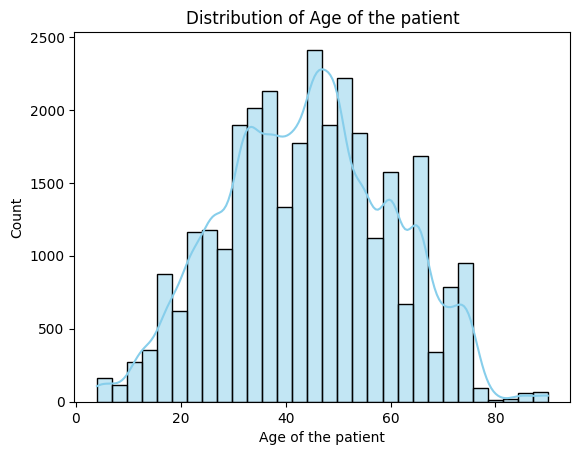

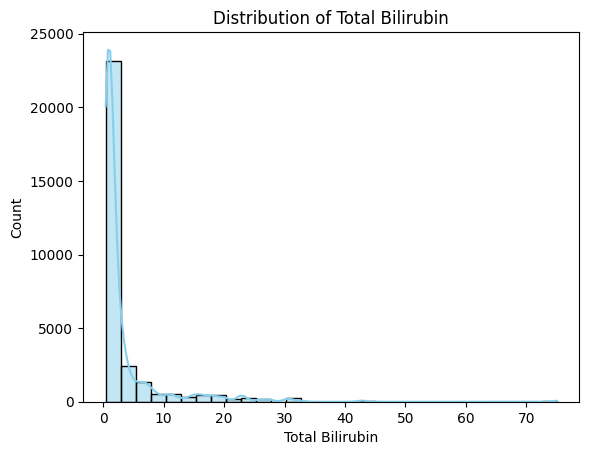

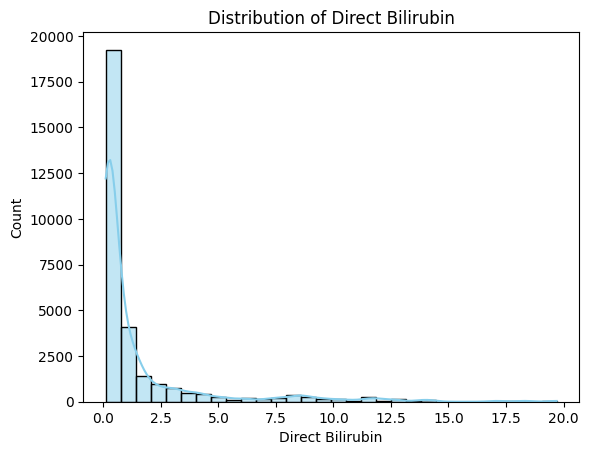

KeyError: 'Alkphos Alkaline Phosphotase'

<Figure size 640x480 with 0 Axes>

In [10]:
# --- UNIVARIATE ANALYSIS ---
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()

for col in cat_cols:
    plt.figure()
    sns.countplot(x=df[col], palette='pastel')
    plt.title(f'Count of {col}')
    plt.show()